In [1]:
import os
import sys
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pycausal.pycausal import pycausal

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from aitia_explorer.app import App

# stop the warning clutter
import warnings
warnings.filterwarnings('ignore')

In [2]:
pc = pycausal()
pc.start_vm()

In [3]:
aitia = App()

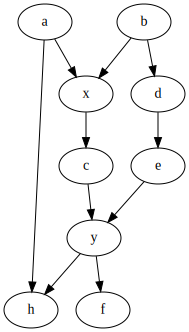

In [4]:
scm1 = aitia.data.scm1()
scm1.cgm.draw()

In [5]:
target_graph_str = str(scm1.cgm.draw())
target_graph_str

'digraph {\n\tx [label=x shape=ellipse]\n\ta [label=a shape=ellipse]\n\tf [label=f shape=ellipse]\n\tb [label=b shape=ellipse]\n\th [label=h shape=ellipse]\n\td [label=d shape=ellipse]\n\te [label=e shape=ellipse]\n\ty [label=y shape=ellipse]\n\tc [label=c shape=ellipse]\n\ta -> x\n\ta -> h\n\tb -> x\n\tb -> d\n\tx -> c\n\tc -> y\n\ty -> f\n\ty -> h\n\td -> e\n\te -> y\n}'

In [6]:
df = scm1.sample(1000)
df

,b,d,e,a,x,c,y,h,f
0,0.690103,-2.094232,-3.371494,-1.470159,1,0.505619,5.536976,5.181346,4.326036
1,-0.300310,-0.557669,-0.437269,-0.915088,1,1.124369,4.686109,5.005173,2.401123
2,-1.073493,1.502230,2.415533,0.323410,1,1.301071,0.276917,1.446049,1.079158
3,0.786186,-1.334497,-3.169765,-0.193036,0,1.645384,8.714108,9.594008,4.220441
4,0.248916,-0.231050,-0.595930,1.457443,1,1.177453,3.450978,8.494505,2.827529
...,...,...,...,...,...,...,...,...,...
995,-0.496742,2.455983,4.550270,-0.661741,1,-0.466595,-4.587546,-7.326674,-2.534945
996,-0.144637,0.332679,1.483282,0.706611,1,0.829282,2.092614,3.399742,1.025008
997,0.627185,-0.690722,-0.930263,1.669107,1,2.285692,6.413584,12.192055,4.166199
998,-0.195813,2.152757,5.303336,-0.575188,1,0.556016,-4.210926,-7.411520,-1.008985


In [7]:
analysis_results, summary = aitia.run_analysis(df, 
                                               target_graph_str=target_graph_str, 
                                               algorithm_list=[aitia.algo_runner.PC],
                                               pc=pc)
summary

,Algorithm,Isomorphic to Target?,AURC,SHD
0,PC,False,0.718519,6


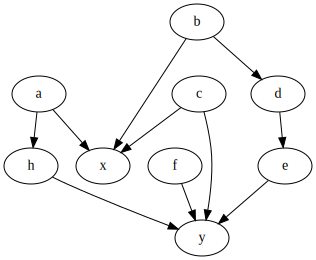

In [8]:
analysis_results[0]['causal_graph'].draw()

In [9]:
X = df
from sklearn import mixture
gmm = mixture.BayesianGaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)

In [10]:
list(X)

['b', 'd', 'e', 'a', 'x', 'c', 'y', 'h', 'f']

In [11]:
X.shape

(1000, 9)

In [8]:
data_new = gmm.sample(200)
X_new = pd.DataFrame(data_new[0], columns=list(X))
X_new

,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Genetics,Attention_Disorder,Born_an_Even_Day,Car_Accident,Fatigue,Allergy,Coughing,Lung_cancer
0,1.024534,1.014499,1.106686,0.570671,-0.248094,-0.128146,0.043002,0.883214,1.013521,0.628556,1.525750,0.996880
1,0.983291,0.980557,0.806867,0.138881,0.215866,0.829756,0.075302,0.952496,0.968629,0.263043,1.028042,0.998725
2,0.975121,0.975724,0.717177,0.983323,0.095882,0.719609,-0.464247,0.496127,0.992151,0.762626,1.077556,0.997988
3,0.997053,1.006147,0.744055,1.215868,0.460811,0.467406,-0.010009,0.969777,0.997362,0.254489,1.389440,1.004164
4,1.003604,1.004682,0.887397,-0.117375,1.079384,1.353616,0.392226,0.790836,1.010704,0.424218,1.003815,0.991414
...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.941154,1.365814,-0.225996,-0.373215,-0.070222,0.476673,-0.169257,0.958559,0.743609,-0.216595,-0.244137,0.312759
196,0.976099,1.073352,1.253386,-0.580087,-0.102736,0.008664,0.888981,1.026537,0.477464,0.118994,-0.206874,0.558252
197,1.021754,1.024903,1.356943,0.182930,0.084493,0.070997,1.030193,1.442338,1.099545,-0.332247,-0.693025,0.059675
198,1.022875,1.321027,0.773962,-0.287774,-0.160287,-0.035652,1.018546,0.761517,-0.616571,0.169810,-0.399060,0.382938


In [7]:
analysis_results2, summary2 = aitia_ex.run_analysis(X_new, target_graph_str=None, pc=pc)
summary2

NameError: name 'aitia_ex' is not defined

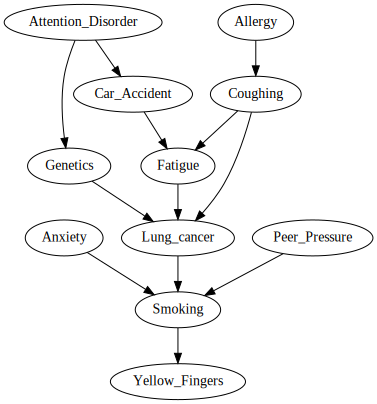

In [12]:
analysis_results[0]['causal_graph'].draw()